## Exercise - Fitting a Sphere

Consider the problem of fitting a sphere $\{x \in \mathbb{R}^n : ||x-x_c|| = r\}$ to $m$ points $u_1, \dots, u_m \in\mathbb{R}^n$, by minimising the error function

$$
\sum_{i=1}^m \left(||x_c - u_i||_2^2-r^2\right)^2
$$

over the variables $x_c\in\mathbb{R}^n$ (the coordinates of the center of the sphere) and $r\in\mathbb{R}$ (the radius of the sphere).

This problem is not convex, however, it can be transformed in an LP by applying the method explained in **Section 2** of this paper:

https://ir.canterbury.ac.nz/bitstream/handle/10092/11104/coope_report_no69_1992.pdf

**Warning:** The paper uses a different notation than the one used within this exercise. In particular, the paper uses the symbols $a_j$ and $x$ to refer to the data point $u_i$ and the center $x_c$, respectively. 



Consider the problem instance given by the code below.

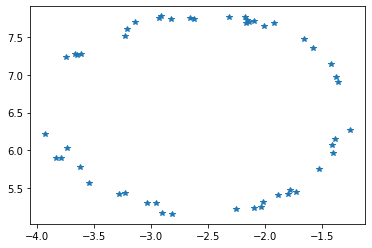

In [ ]:
# Generation of the data points
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math

n = 2 # plane
m = 50 # number of points
U = np.array([[-3.8355737e+00,5.9061250e+00],\
  [-3.2269177e+00,7.5112709e+00],\
  [-1.6572955e+00,7.4704730e+00],\
  [-2.8202585e+00,7.7378120e+00],\
  [-1.7831869e+00,5.4818448e+00],\
  [-2.1605783e+00,7.7231450e+00],\
  [-2.0960803e+00,7.7072529e+00],\
  [-1.3866295e+00,6.1452654e+00],\
  [-3.2077849e+00,7.6023307e+00],\
  [-2.0095986e+00,7.6382459e+00],\
  [-2.0965432e+00,5.2421510e+00],\
  [-2.8128775e+00,5.1622157e+00],\
  [-3.6501826e+00,7.2585500e+00],\
  [-2.1638414e+00,7.6899057e+00],\
  [-1.7274710e+00,5.4564872e+00],\
  [-1.5743230e+00,7.3510769e+00],\
  [-1.3761806e+00,6.9730981e+00],\
  [-1.3602495e+00,6.9056362e+00],\
  [-1.5257654e+00,5.7518622e+00],\
  [-1.9231176e+00,7.6775030e+00],\
  [-2.9296195e+00,7.7561481e+00],\
  [-3.2828270e+00,5.4188036e+00],\
  [-2.9078414e+00,5.1741322e+00],\
  [-3.5423007e+00,5.5660735e+00],\
  [-3.1388035e+00,7.7008514e+00],\
  [-1.7957226e+00,5.4273243e+00],\
  [-2.6267585e+00,7.7336173e+00],\
  [-3.6652627e+00,7.2686635e+00],\
  [-3.7394118e+00,6.0293335e+00],\
  [-3.7898021e+00,5.9057623e+00],\
  [-3.6200108e+00,5.7754097e+00],\
  [-3.0386294e+00,5.3028798e+00],\
  [-2.0320023e+00,5.2594588e+00],\
  [-2.9577808e+00,5.3040353e+00],\
  [-2.9146706e+00,7.7731243e+00],\
  [-3.2243786e+00,5.4402982e+00],\
  [-2.1781976e+00,7.7681141e+00],\
  [-2.2545150e+00,5.2233652e+00],\
  [-1.2559218e+00,6.2741755e+00],\
  [-1.8875105e+00,5.4133273e+00],\
  [-3.6122685e+00,7.2743342e+00],\
  [-2.6552417e+00,7.7564498e+00],\
  [-1.4127560e+00,6.0732284e+00],\
  [-3.7475311e+00,7.2351834e+00],\
  [-2.1367633e+00,7.6955709e+00],\
  [-3.9263527e+00,6.2241593e+00],\
  [-2.3118969e+00,7.7636052e+00],\
  [-1.4249518e+00,7.1457752e+00],\
  [-2.0196394e+00,5.3154475e+00],\
  [-1.4021445e+00,5.9675466e+00]]).T

plt.plot(U[0],U[1],'*')
plt.show()

Read **Section 2** of the paper (you do not need to read other parts of the paper) and 

1.   Find the optimal $x_c$ and $r$ using CVX.
2.   Plot the data points together with the found best circle.

## Solution 

In [ ]:
r = cp.Variable()
xc = cp.Variable(2)

y = [xc[i] if i < n else cp.sum_squares(xc) - r**2 for i in range(n+1)]
y = cp.vstack(y)

B = np.array([[U[0,i],U[1,i],1] for i in range(m)])
d = np.linalg.norm(U, axis=0, keepdims=True)

objective = cp.Minimize(cp.quad_form(cp.norm(B @ y - d,2),2))
prob = cp.Problem(objective)

prob.solve()


Exception: ignored

In [ ]:
y = np.ndarray(3)
y[0] = int(2*xc[0])
y[1] = 2*xc[1]


TypeError: ignored

In [ ]:
y

array([3.5e-323, 4.0e-323, 4.4e-323])

In [ ]:
xc[0]

Expression(AFFINE, UNKNOWN, ())

# Exercise

Consider the problem of finding the rectangle

$$
\mathcal{R} = \{x \in\mathbb{R}^n : l \preceq x \preceq u\}
$$

of maximum volume, enclosed in a polyhedron $\mathcal{P} = \{x : Ax\preceq b\}$. The variables are
$l$, $u \in \mathbb{R}^n$. A straightforward, but very inefficient, way to express the constraint $\mathcal{R} \subseteq \mathcal{P}$ is to use the set of $m2^n$ inequalities $Av^i \preceq b$, where $v^i$ are the $2^n$ corners of $\mathcal{R}$. Fortunately it is possible to express the constraint in a far more efficient way. Define

$$
a_{ij}^+ = \max\{a_{ij},0\}, \qquad a_{ij}^- = \max\{-a_{ij},0\}
$$

Then we have $\mathcal{R} \subseteq \mathcal{P}$ if and only if

$$
\sum_{j=1}^n (a_{ij}^+ u_j - a_{ij}^- l_j) \le b_i, \qquad i=1,\dots,m.
$$

The maximum volume rectangle is the solution of the problem

$$
\begin{array}{ll}
\displaystyle \max & \displaystyle\left(\prod_{i=1}^n (u_i-l_i)\right)^{\frac{1}{n}} \\ 
\text{s.t. } & \displaystyle \sum_{j=1}^n (a_{ij}^+ u_j - a_{ij}^- l_j) \le b_i, \quad i=1,\dots,m.\\
\end{array}\tag{1}
$$



1.   Solve problem $(1)$ using the function CVX function [geo_mean](https://www.cvxpy.org/api_reference/cvxpy.atoms.other_atoms.html?highlight=geo_mean#cvxpy.atoms.geo_mean.geo_mean). Use the data given below.
2.   Another way of solving the problem is by taking the logarithm of the objective function in $(1)$ and transforming the product in sum. Solve the problem in this way, then tranform back the optimal value to show that the volume is the same.



### Data

In [ ]:
import cvxpy as cp
import numpy as np

In [ ]:
# Data of the problem
n= 40
m = 70
b = np.array([[ 490. ,  230. ,  140. ,  600. ,  210. ,   29. ,  830. ,  140. ,
          14. ,  200. ,   68. ,  590. ,  170. ,  700. ,  170. ,  730. ,
         460. ,   27. ,  430. ,  600. ,  600. ,  290. ,  690. ,   62. ,
        1100. ,  230. ,  430. ,  860. ,  950. ,  440. ,   68. ,  480. ,
          55. ,    7.5,  180. ,  600. ,  750. ,  290. ,  300. ,  660. ,
         870. ,  350. ,  100. ,  140. ,  220. ,   66. ,  180. ,  290. ,
         360. ,  100. ,  130. ,  310. ,   43. ,   23. ,  260. ,  120. ,
          13. ,  560. ,  590. ,  230. ,   14. ,  380. ,  770. ,  620. ,
         180. ,  200. ,  510. ,  120. , 1600. ,  210. ]]).T
A = np.array([[ 1.2e+00, -1.5e+00,  2.9e-01, -1.1e+00,  4.7e-01, -5.3e-01,
         1.9e+00, -5.9e-01,  4.0e-01, -3.8e-01,  7.3e-01, -4.9e-01,
         1.7e-01,  6.6e-01, -3.0e-01,  4.3e-01, -1.7e-01, -7.4e-01,
         1.7e+00, -1.7e+00,  2.5e-01,  1.1e+00, -4.9e-01, -3.3e-02,
        -5.0e-01,  3.3e-01, -6.8e-01,  6.0e-01, -4.7e-01, -1.8e+00,
        -3.8e-01,  1.3e+00, -1.2e+00,  7.1e-01,  2.2e-01, -7.5e-01,
         6.5e-01, -6.4e-01,  1.6e+00,  4.2e-01],
       [ 5.6e-01, -6.9e-01,  1.1e+00, -9.4e-01,  6.4e-01, -1.6e+00,
        -3.2e-01, -3.2e-02, -4.3e-01, -1.7e+00, -1.0e+00, -8.5e-01,
        -2.5e-01, -1.8e-01,  1.0e+00,  1.0e+00,  1.3e-01,  1.4e-01,
        -3.4e-01,  1.1e-01,  5.0e-01,  7.5e-01, -1.3e+00, -4.1e-01,
        -1.3e+00,  2.3e-01, -1.8e+00, -8.4e-01,  9.5e-01,  6.2e-01,
         1.9e-02,  4.4e-01,  5.3e-01, -6.0e-01,  7.7e-01,  7.2e-01,
        -9.3e-01,  2.2e-01, -1.8e+00, -8.4e-02],
       [ 3.4e-01, -2.2e-02, -3.3e-01,  8.8e-02,  1.4e+00,  8.2e-01,
        -2.5e-01, -1.7e+00, -1.5e+00,  6.4e-01, -7.3e-01, -1.4e+00,
        -1.3e+00, -8.5e-01, -1.4e+00, -3.9e-01,  8.5e-02, -1.7e+00,
        -1.6e+00,  7.6e-01,  4.4e-03, -1.0e+00, -1.4e+00, -1.5e+00,
         6.0e-01, -7.2e-01, -1.6e-01, -1.5e+00,  7.1e-01,  6.1e-01,
        -1.2e-01, -2.2e+00,  4.8e-01, -2.9e-02,  1.3e-01, -8.3e-01,
         1.6e+00, -1.3e-01,  7.0e-01,  5.4e-01],
       [ 1.4e+00,  1.8e-01, -7.4e-02, -7.0e-01,  4.3e-02,  4.5e-01,
        -3.1e-01,  8.1e-01,  6.6e-01,  1.2e+00,  2.3e-01, -4.8e-01,
        -3.6e-01,  1.6e+00,  2.7e-01, -1.8e-01, -4.2e-01, -6.3e-01,
         4.1e-01, -8.9e-01, -5.5e-01,  1.8e+00, -1.3e+00,  5.2e-01,
         3.7e-01,  1.4e-02, -6.3e-01,  7.9e-02, -1.3e+00, -1.0e+00,
        -7.3e-01, -3.4e-02, -1.7e+00,  9.5e-01, -3.9e-01,  7.1e-01,
         9.5e-01, -8.8e-01, -9.2e-01, -1.8e+00],
       [-4.9e-01, -5.3e-01, -1.6e-01,  3.0e-01, -2.5e-02, -1.3e+00,
         2.1e+00,  5.0e-01, -2.7e-01,  9.1e-01, -1.3e+00, -8.6e-01,
        -3.6e-01, -5.6e-01, -1.3e-01,  2.1e+00, -7.1e-01,  2.9e-01,
         1.0e+00, -8.5e-02, -1.1e+00,  2.4e-01,  5.4e-02,  3.8e-01,
        -8.2e-02, -8.8e-01, -1.9e-01,  1.2e+00,  3.6e-01,  5.6e-02,
         9.5e-01, -1.6e-01,  1.1e-01,  3.3e-01, -3.8e-01,  1.3e+00,
         1.1e+00, -3.4e-01,  1.7e+00, -1.4e-01],
       [-6.7e-02, -1.3e+00,  8.3e-01, -6.4e-02, -5.6e-01,  4.6e-01,
         4.7e-01,  2.4e+00, -3.2e-01, -3.7e-01,  1.0e+00, -4.1e-01,
         7.4e-01, -1.9e+00, -9.5e-02,  1.0e+00, -1.8e+00, -7.8e-01,
         1.6e+00,  3.2e-01, -1.0e+00, -1.9e+00,  2.1e+00, -8.3e-01,
         1.4e-01, -1.4e+00,  4.6e-01, -2.1e-01, -1.3e+00, -1.4e+00,
        -3.9e-01,  9.9e-01,  1.7e-01, -3.3e-01,  1.6e+00,  8.7e-01,
        -2.5e-01, -6.9e-01, -8.8e-01, -3.4e-01],
       [-1.9e+00, -2.1e-01, -2.8e+00,  6.4e-01, -1.1e+00,  2.1e-01,
        -2.1e-01,  8.4e-01,  5.6e-01, -1.0e+00, -7.4e-01, -1.3e+00,
         9.1e-01, -5.3e-01, -5.3e-01, -7.4e-04,  9.9e-01,  2.5e+00,
        -1.2e+00, -4.0e-01,  2.1e-01,  2.7e+00,  8.3e-01, -9.7e-01,
         2.4e+00, -2.2e+00, -9.6e-01, -7.7e-02,  3.1e-01,  3.9e-01,
         9.0e-01,  1.4e-01,  6.4e-01, -1.7e+00, -4.8e-01, -8.7e-01,
         1.1e+00,  8.0e-01, -5.0e-01, -2.7e-01],
       [-3.4e-01,  3.4e-01,  1.5e+00, -3.6e-01, -6.0e-01,  6.1e-01,
        -1.6e+00,  7.1e-01, -2.7e-01, -3.8e-01, -6.6e-02,  8.4e-02,
         2.6e-01, -7.2e-01, -4.7e-01, -1.4e+00,  6.9e-01, -3.0e-01,
        -4.3e-01, -5.3e-01,  9.2e-01, -3.3e-01,  1.3e+00,  1.5e+00,
        -8.6e-01,  8.6e-01, -9.9e-01, -9.5e-01, -1.4e+00, -1.6e+00,
        -1.5e+00,  2.4e-01,  8.5e-01, -5.3e-01,  1.1e+00,  9.0e-01,
         2.7e-01,  5.6e-01,  1.1e+00,  7.7e-02],
       [-3.4e-02, -2.4e+00,  2.7e-01,  2.5e-01,  2.0e+00, -7.6e-01,
        -8.2e-01, -1.0e+00, -2.1e-01,  1.5e+00,  3.3e-01, -6.4e-01,
         8.6e-01,  1.5e-01,  2.8e-02,  3.1e-01,  8.2e-01, -1.3e-01,
         1.5e+00,  7.6e-01, -1.2e+00,  3.9e-01,  1.3e+00, -9.8e-01,
        -2.0e+00,  1.5e+00, -9.0e-01, -9.1e-02, -1.0e+00,  2.8e+00,
         7.4e-01,  6.6e-01, -3.9e-01,  5.1e-01, -3.7e-01, -2.5e+00,
        -6.8e-01, -2.8e-01, -2.0e+00,  1.3e+00],
       [-4.4e-01, -1.5e+00,  3.5e-02,  2.7e-01, -7.5e-01,  1.0e+00,
        -1.6e-01, -1.1e-01,  2.5e-01, -2.5e-01, -8.5e-01, -7.8e-01,
         2.4e-01,  3.7e-01, -9.1e-01,  1.9e-01, -8.3e-01,  1.7e+00,
        -8.2e-01,  9.6e-01,  2.7e-01, -1.3e-01,  4.0e-01,  1.1e+00,
         1.9e-01,  1.3e-01,  7.0e-01, -7.5e-01, -1.2e+00, -8.2e-01,
        -1.1e+00,  1.3e+00, -1.4e+00,  1.3e-01,  4.4e-01, -5.9e-01,
         1.0e+00, -1.8e-01, -1.9e+00, -1.2e+00],
       [-1.6e-01, -2.6e+00,  4.4e-01, -1.2e+00, -1.1e+00,  8.5e-01,
         1.6e+00, -3.1e-01, -4.5e-01, -1.7e-01,  3.8e-01,  7.3e-01,
         5.2e-01,  3.1e-01, -1.0e+00,  1.3e+00,  6.3e-01, -7.9e-03,
        -9.4e-01, -3.0e-01, -5.1e-01,  7.3e-01,  9.2e-02, -1.8e+00,
        -8.5e-01,  1.5e+00,  2.0e-01,  3.0e-01,  1.2e+00, -5.2e-01,
         6.3e-01, -7.8e-01,  3.8e-02,  7.4e-02, -1.6e+00, -5.9e-01,
        -3.6e-01, -3.9e-01, -7.7e-03, -9.1e-01],
       [-1.4e+00,  7.4e-01, -9.8e-01,  9.9e-01,  1.0e+00,  5.6e-01,
         7.4e-01, -2.2e-01,  1.1e+00, -2.0e-01,  1.2e-01,  1.2e-02,
         8.7e-01, -8.8e-02, -6.1e-01, -1.6e+00, -1.9e+00,  8.5e-01,
        -1.4e+00,  3.5e-01,  3.9e-01, -2.2e-01, -1.3e+00, -1.4e-01,
        -8.3e-01, -1.5e+00,  1.8e-01,  8.6e-01,  2.2e+00, -7.0e-01,
        -3.5e-01, -7.2e-01,  1.3e-01, -2.6e-01,  2.8e+00, -8.4e-01,
         1.5e-01,  8.8e-02, -4.1e-01, -3.0e-01],
       [-3.9e-01,  3.0e-01, -2.0e-01,  1.9e-01, -8.6e-01,  6.8e-01,
        -1.3e+00, -1.2e+00, -4.9e-01,  9.0e-01, -2.8e-01,  1.5e+00,
        -3.5e-01,  9.7e-01,  6.2e-01, -3.6e-01,  8.1e-02, -3.2e-01,
         8.0e-01,  1.7e+00,  1.7e+00, -4.2e-01, -2.2e-01,  1.0e+00,
        -1.8e-01,  1.9e+00,  3.9e-01, -1.3e+00, -1.5e+00, -3.6e-01,
         1.2e-01,  2.4e+00, -1.2e-01,  4.6e-01, -1.2e+00, -7.6e-01,
        -3.6e-01,  5.1e-01,  1.8e-01, -5.5e-01],
       [ 1.6e+00,  1.5e+00, -2.7e-01,  6.0e-01,  1.9e-01,  4.1e-01,
        -3.4e-01,  6.9e-01,  8.8e-01,  4.1e-01, -4.9e-02, -1.8e+00,
        -1.5e+00,  4.6e-01, -4.7e-01,  6.5e-01,  8.7e-01,  1.8e+00,
         8.4e-02, -1.0e+00, -4.5e-02, -4.7e-02, -1.8e+00, -2.1e+00,
        -7.7e-01, -8.8e-01, -1.2e+00,  1.4e+00, -2.3e-01,  3.9e-01,
        -3.8e-01,  2.3e+00, -4.7e-01, -8.1e-02, -1.4e+00, -2.2e-01,
         1.7e+00, -3.7e-01,  1.9e-01, -5.8e-01],
       [-3.8e-01, -7.2e-01, -4.2e-01,  1.2e+00,  1.1e-01,  2.2e+00,
        -5.8e-01, -2.6e-01,  2.5e-01, -7.6e-01, -2.5e-02, -6.7e-01,
         1.4e+00,  8.2e-01, -1.5e+00,  1.0e+00,  1.2e+00, -2.2e-01,
         1.2e-01, -1.3e+00,  5.2e-01, -1.6e+00,  2.0e-01, -5.9e-01,
         4.0e-01, -8.9e-02, -1.5e+00, -1.4e-01,  5.4e-01, -2.0e-01,
        -7.5e-01,  2.8e+00,  4.4e-01,  1.5e+00,  2.1e+00,  9.4e-01,
         7.7e-01,  7.5e-01, -1.1e+00,  1.1e+00],
       [ 1.7e+00, -7.1e-01,  4.9e-01, -1.1e-01, -4.1e-01,  1.9e+00,
        -1.1e+00, -1.0e-02, -2.6e-01, -1.3e+00, -1.3e+00, -7.2e-01,
         5.1e-01, -1.8e+00,  1.2e+00,  1.8e-01,  9.8e-01,  1.1e+00,
         4.9e-01,  1.1e-01, -8.4e-01,  1.1e+00, -1.0e+00, -1.0e+00,
        -1.8e+00, -6.0e-01, -9.7e-01, -3.0e-01, -4.6e-01, -2.0e+00,
        -9.5e-01,  4.2e-01,  5.3e-01, -1.1e+00, -4.6e-01,  1.9e-01,
        -8.0e-01, -1.2e+00, -9.8e-01,  1.7e+00],
       [ 1.0e+00, -1.9e+00, -4.0e-01, -1.6e+00,  1.0e+00,  7.5e-01,
        -1.7e-01,  8.2e-01,  2.9e+00, -7.6e-01, -7.1e-01, -1.0e-01,
        -9.3e-01,  9.2e-01, -9.6e-01,  8.0e-01,  5.6e-01, -3.6e-01,
         7.3e-01,  6.8e-01, -1.0e+00,  1.1e+00, -8.4e-01,  9.6e-01,
         1.9e-01,  7.0e-01,  6.7e-01,  1.2e+00, -1.8e+00,  1.1e-01,
         4.1e-02, -1.5e-01, -5.7e-01,  2.4e+00,  5.7e-02,  4.9e-01,
        -5.7e-01,  1.3e+00,  5.9e-01, -1.0e+00],
       [ 6.3e-02, -2.9e-01, -1.4e-01,  2.1e-01, -1.2e+00, -1.6e+00,
         1.1e+00, -1.8e-01,  9.5e-01, -1.3e+00,  2.1e-01, -1.6e-01,
        -8.5e-01, -1.9e+00,  5.1e-01,  3.2e-01,  1.4e+00, -1.4e+00,
        -1.6e-01,  8.2e-01, -3.9e-01, -1.3e+00, -4.1e-01, -1.1e+00,
         7.6e-01,  1.3e+00, -1.4e+00, -1.1e+00,  3.6e-01, -9.8e-01,
         1.3e-01, -1.0e+00, -5.6e-01,  9.4e-01, -1.1e+00, -2.6e+00,
         2.8e-01,  3.4e-01,  1.2e+00,  1.3e-01],
       [-1.0e+00,  1.9e-02, -1.0e-01,  1.1e+00, -1.3e+00, -6.4e-01,
         1.3e+00, -7.3e-01, -1.6e+00,  7.2e-01,  3.9e-01,  2.4e-01,
        -1.4e+00, -5.2e-01, -2.0e-01, -1.8e+00, -1.3e+00,  6.7e-01,
         6.9e-01, -1.9e+00, -7.4e-01, -1.2e+00, -5.2e-01, -2.5e-02,
         2.2e-02,  9.7e-02,  4.0e-02,  3.0e+00,  8.6e-01, -9.6e-01,
        -1.3e+00,  1.4e+00, -1.9e+00, -1.5e+00, -4.0e-01, -6.2e-01,
         4.9e-01,  8.5e-01, -3.8e+00, -4.1e-01],
       [-1.4e+00, -3.4e-01,  2.0e-01,  1.4e+00, -2.1e-01, -5.8e-01,
         4.6e-01,  3.3e-01, -2.7e-02,  6.9e-01, -1.3e-01,  7.6e-01,
         9.8e-01,  1.0e+00,  2.7e-01,  1.2e-01, -1.9e-01,  2.0e-01,
        -3.7e-01,  1.1e+00,  9.0e-01, -1.2e+00,  2.6e-01,  6.0e-01,
        -1.7e+00,  7.3e-02, -5.1e-01, -2.4e-01,  1.2e+00,  7.5e-01,
        -2.0e-01,  6.6e-01, -6.3e-01, -3.4e-01, -1.6e-01, -4.0e-01,
         1.1e+00,  6.4e-01,  1.1e+00, -1.2e+00],
       [ 1.4e+00, -1.8e+00, -1.2e-01, -2.6e-01, -1.3e+00, -4.5e-01,
        -9.6e-01, -1.7e-01, -8.8e-01, -1.8e-01, -9.4e-01,  8.6e-01,
         2.2e-02, -6.5e-02, -1.3e+00, -9.3e-01,  4.7e-01,  5.9e-01,
        -2.7e-01,  2.1e-02,  9.2e-01,  2.2e-01, -1.0e+00, -3.2e-01,
         1.2e-01, -4.9e-01, -6.5e-01, -1.0e-01, -1.3e+00,  9.5e-02,
         1.4e+00, -8.2e-01, -4.7e-01, -3.3e-01, -5.6e-02,  5.4e-01,
        -1.0e+00, -1.3e+00, -4.7e-01,  1.1e+00],
       [-6.6e-01,  3.5e-01, -1.6e-01,  1.3e+00,  8.1e-01, -1.7e-01,
        -1.0e+00,  3.0e-01, -2.3e-01,  1.3e+00,  9.6e-01, -9.0e-01,
         9.2e-01, -1.0e-01, -5.3e-01, -5.5e-01,  3.3e-01,  1.3e+00,
        -1.6e+00, -2.3e+00, -2.8e-01, -1.4e+00, -1.0e-01, -4.5e-01,
         1.1e-01, -8.3e-01, -1.0e+00, -4.7e-01,  1.0e-01,  1.2e-01,
        -7.0e-01,  1.9e+00, -6.1e-01,  2.4e-01,  1.1e+00, -1.2e+00,
         4.1e-01, -6.7e-01,  1.0e+00,  1.8e-01],
       [-1.6e+00, -1.3e+00, -4.9e-01,  1.9e-01,  1.2e+00, -4.2e-01,
        -2.3e-01, -1.3e+00,  9.3e-01,  9.6e-01,  6.2e-01,  1.2e-01,
        -1.9e-01,  4.4e-01, -2.8e-01,  5.0e-01, -4.6e-01, -3.4e-01,
        -1.2e+00, -4.2e-01, -2.8e-02,  3.6e-01, -6.4e-02, -1.8e+00,
        -8.2e-01,  8.0e-01,  9.0e-01, -8.0e-01,  3.1e+00,  7.2e-01,
        -2.1e-01, -8.2e-01,  4.9e-01, -1.2e+00, -1.8e+00,  1.2e-02,
        -3.7e-01,  1.8e-01,  5.0e-01, -2.7e+00],
       [ 1.4e-01,  7.7e-01, -5.2e-01, -6.0e-02, -1.2e+00, -6.3e-01,
         5.3e-01, -1.1e+00, -6.6e-02, -3.7e-01, -2.5e-01, -2.2e-01,
        -8.2e-02, -6.2e-01, -1.6e+00,  3.9e-02, -8.5e-01,  3.0e-01,
        -3.0e-01,  2.1e-01, -1.7e-01,  6.3e-01,  7.0e-01, -7.9e-01,
         3.3e-01,  1.4e+00, -1.8e+00, -2.5e-01, -9.5e-01,  1.5e-01,
        -6.9e-01, -4.9e-01, -3.0e-01,  7.0e-01, -1.1e+00, -1.2e+00,
        -9.6e-01, -1.7e+00, -1.2e+00,  2.3e-01],
       [-2.6e+00,  7.5e-02, -1.6e-01, -5.3e-01, -3.6e-01, -1.8e-01,
         6.6e-01,  4.7e-01,  6.9e-01, -8.6e-01, -1.1e+00, -4.5e-01,
         6.5e-01,  2.5e-01,  2.8e-02,  1.5e-03,  1.5e+00,  5.8e-01,
        -1.5e+00,  4.3e-01,  3.0e-01, -1.3e+00,  7.6e-01, -1.1e+00,
         6.1e-01, -2.8e-01,  4.6e-01, -1.1e-01,  1.4e+00, -9.2e-01,
        -4.9e-01,  2.0e+00,  1.2e+00,  7.7e-01,  1.1e+00,  8.4e-01,
        -1.7e-02,  1.4e+00,  2.5e-01, -7.5e-01],
       [-5.5e-01,  2.5e+00,  2.2e-02,  2.4e-01, -1.0e+00,  2.2e-01,
         2.1e+00,  9.6e-01, -4.9e-01,  7.5e-01,  6.1e-01,  8.7e-01,
         6.6e-01,  8.3e-02,  3.6e-01,  1.7e-02,  5.6e-01, -6.3e-01,
         1.7e+00,  1.2e-01, -3.7e-01,  7.1e-02, -1.2e+00, -3.7e-01,
        -9.6e-01, -1.2e+00, -2.3e-01,  1.2e+00, -8.7e-01,  1.1e+00,
         2.1e-01, -1.9e+00,  1.9e+00,  1.0e-01,  3.1e-01,  6.9e-01,
         1.3e+00,  9.8e-01,  3.8e-01,  8.6e-01],
       [ 1.0e+00,  1.1e+00, -1.1e+00,  8.2e-01, -7.6e-01,  5.4e-01,
        -1.4e+00, -3.0e+00, -6.2e-01,  7.4e-01,  1.6e-01, -1.1e-01,
         1.4e+00, -6.5e-01,  3.9e-01,  1.7e+00, -1.9e+00,  5.2e-01,
        -2.0e+00,  1.8e-01, -8.2e-01, -2.3e+00,  2.8e+00,  2.0e+00,
         6.0e-01,  9.0e-02, -1.5e+00,  4.5e-01,  2.4e+00, -2.5e-01,
         2.0e+00,  2.3e+00, -5.2e-01, -2.5e-03, -1.9e+00, -7.6e-01,
        -2.9e-01,  5.3e-01, -2.4e+00, -6.6e-02],
       [ 2.0e+00,  1.0e+00, -4.6e-02,  1.7e+00,  1.7e+00, -1.4e+00,
        -8.2e-02,  1.3e+00, -2.0e-01,  9.6e-01, -7.0e-01,  9.3e-01,
        -4.5e-01,  5.4e-01,  5.1e-02,  1.1e+00, -8.3e-01, -1.0e+00,
        -1.4e+00,  8.9e-02, -7.4e-01,  1.0e-01,  2.6e-01, -5.0e-01,
        -1.2e+00, -4.4e-02,  1.1e+00, -3.7e-03, -1.1e+00, -8.4e-01,
        -1.2e+00, -1.3e+00, -1.5e+00, -1.1e+00,  1.6e+00,  2.4e-01,
         1.2e+00, -1.5e+00, -7.4e-01, -1.3e+00],
       [ 2.2e+00,  1.7e+00, -5.6e-01,  9.4e-01, -4.6e-01, -2.4e-01,
         2.0e-01, -1.2e+00, -1.0e-01,  1.9e-01, -5.0e-01,  6.9e-02,
         2.6e-01,  8.1e-01, -8.3e-01, -2.2e-01,  7.6e-01, -1.0e-01,
         2.6e-01,  5.4e-01,  1.7e+00, -1.6e+00,  1.6e-01, -1.9e-02,
         3.0e-01, -2.0e-01,  8.3e-01, -5.7e-01,  6.0e-01,  7.3e-01,
         5.4e-01, -1.1e-01, -5.2e-01,  3.2e-01,  5.7e-01, -3.6e-01,
         1.3e+00, -1.4e+00,  7.2e-01, -5.9e-01],
       [ 1.0e+00,  1.3e+00,  4.0e-01, -4.1e-03,  5.1e-01,  3.6e-01,
        -1.7e+00,  4.0e-01,  1.5e+00, -3.5e-01,  3.8e-03,  2.4e-01,
         1.2e-01,  7.6e-01,  8.4e-01,  7.5e-01, -1.2e+00, -3.1e-01,
         1.8e-01, -1.9e+00, -5.8e-01, -1.2e+00,  3.8e+00,  7.3e-02,
        -1.2e+00, -5.2e-01, -5.6e-01,  1.2e-01, -2.8e-02,  1.2e+00,
        -1.4e+00, -4.2e-01,  6.5e-01, -1.3e+00, -5.7e-01, -3.0e-01,
         2.0e+00,  3.2e-01,  1.0e+00, -5.1e-02],
       [-1.6e-01, -9.0e-01,  3.2e-01,  6.6e-01, -1.2e+00, -6.7e-01,
        -5.3e-01,  7.7e-01, -1.6e+00, -6.2e-01,  4.0e-01, -3.3e-01,
        -1.4e+00, -2.1e-01, -8.6e-01, -1.9e-01, -3.5e-01, -1.1e+00,
        -2.4e-01,  8.8e-01, -8.5e-01, -5.7e-01,  9.5e-01, -1.1e+00,
         1.9e-01, -4.5e-01, -9.5e-01,  3.4e-01,  2.3e+00,  2.5e-01,
        -2.0e+00,  7.3e-03, -8.3e-01, -2.5e-01,  5.8e-02,  4.9e-01,
         5.8e-01, -3.4e-01,  1.8e-01, -8.3e-01],
       [ 1.1e+00,  6.6e-01,  1.8e-01, -3.0e-01, -3.5e-01, -9.2e-01,
         6.9e-01,  6.3e-01,  1.3e+00,  1.0e+00, -1.1e-01,  2.3e-01,
        -5.3e-01,  9.7e-01,  6.5e-01, -5.7e-01, -1.8e+00,  2.5e+00,
         1.8e+00, -2.0e-01, -4.0e-01,  6.6e-01,  2.5e-01,  1.1e-01,
        -2.2e+00,  1.5e-01, -3.4e-01, -5.1e-01,  9.6e-01,  8.4e-01,
         1.0e+00, -1.9e+00, -2.2e-01, -3.5e-01,  4.0e-01,  7.6e-01,
        -2.7e-01,  1.7e-01, -1.5e-01,  8.3e-01],
       [ 1.3e-01,  7.5e-02, -7.0e-01, -1.1e+00, -7.2e-02,  1.1e+00,
         3.7e-02,  2.3e-01, -5.4e-03, -1.3e+00, -5.5e-01,  1.3e+00,
        -1.7e+00, -2.6e-02, -2.2e+00, -6.5e-01, -1.1e+00,  2.0e+00,
         5.8e-01,  6.3e-01,  7.2e-01,  1.6e-01, -1.8e-01,  2.1e+00,
        -4.3e-01, -9.7e-01,  6.2e-01,  2.8e-01,  1.3e+00,  1.0e-01,
         2.3e+00, -7.3e-02, -3.0e-01, -3.1e+00, -1.3e+00,  3.7e-01,
         2.0e+00,  1.4e+00, -2.2e+00,  7.7e-01],
       [-1.8e-02,  1.9e-01,  6.6e-01,  3.0e-04,  6.3e-01, -1.5e+00,
        -5.6e-01,  3.1e-01, -2.8e-01, -4.8e-02,  7.0e-01,  1.2e+00,
         1.5e-01, -4.1e-01,  1.1e+00, -8.8e-01, -6.6e-01,  7.1e-01,
        -5.5e-01,  8.3e-01,  2.2e+00,  6.4e-01, -2.5e-01,  1.2e+00,
         8.8e-01,  2.4e-01,  9.3e-01, -9.1e-01, -1.0e+00, -2.7e-01,
        -4.1e-01,  2.2e+00,  3.6e-01,  1.2e+00,  7.6e-02,  3.9e-01,
        -5.9e-01, -4.6e-01, -5.4e-01,  9.9e-01],
       [ 4.3e-01, -5.2e-01, -1.2e-01, -1.5e-01,  4.5e-01, -3.4e-01,
         1.2e+00,  2.5e-01, -6.8e-01,  9.7e-01, -8.4e-01,  2.3e+00,
         2.0e+00,  1.1e+00, -1.3e+00, -7.7e-01,  6.5e-01,  1.5e+00,
        -6.0e-01,  1.0e+00,  3.8e-01, -7.6e-01, -1.4e-02,  3.0e+00,
        -2.0e+00,  8.2e-01, -6.8e-02,  6.7e-01,  1.1e+00, -1.3e+00,
         2.7e-01, -8.3e-01, -2.1e+00, -6.0e-01, -9.9e-01, -1.4e+00,
         7.9e-01,  2.2e-01,  1.3e-01,  1.3e+00],
       [-1.4e+00,  1.0e+00, -4.9e-01,  2.1e-01,  1.8e-01, -8.7e-01,
        -5.5e-01,  1.2e-02, -1.0e+00,  1.8e+00, -4.7e-01,  7.1e-01,
         4.6e-01, -3.1e-01,  1.0e+00, -2.0e+00,  5.0e-01, -1.9e-01,
         3.6e-01, -4.2e-01,  1.5e+00, -9.1e-01, -1.3e+00,  4.5e-01,
         1.9e+00, -1.0e-01, -1.1e-01, -9.2e-01,  8.9e-01,  6.4e-01,
         1.7e-01,  8.9e-01, -1.7e-01, -1.7e-01, -1.2e+00,  1.1e+00,
         6.0e-01,  9.9e-01,  2.8e-01,  1.4e-01],
       [ 1.7e+00,  9.4e-01,  1.4e+00,  1.7e+00, -1.0e+00, -1.8e+00,
        -1.5e+00,  1.5e+00,  1.0e+00, -6.0e-01,  2.7e-01, -2.7e-01,
        -7.7e-01,  3.1e-01,  3.4e-01,  1.4e+00, -3.6e-01, -2.0e+00,
         1.2e+00,  1.5e+00, -1.5e+00, -2.0e-01,  2.9e-01, -4.7e-01,
        -2.7e-01,  1.8e-02,  1.2e+00,  1.1e+00, -2.1e+00, -1.4e+00,
        -8.3e-01, -2.8e-01,  4.8e-01,  2.5e-01,  1.2e+00, -1.3e+00,
        -3.1e-01,  4.1e-01,  5.9e-02,  2.2e+00],
       [ 6.6e-01, -1.1e+00,  6.3e-01, -1.7e+00, -3.8e-01,  1.2e+00,
        -8.7e-01,  1.0e+00, -5.2e-01, -8.4e-01, -1.9e-01, -5.8e-01,
         1.0e+00,  3.6e-01, -2.7e-01, -1.6e-01,  9.7e-01, -1.1e+00,
        -8.9e-01, -1.1e+00, -6.7e-01,  3.3e-01,  4.2e-01,  1.5e+00,
         1.5e-01,  2.1e-01,  1.1e+00, -1.9e+00, -2.0e-01, -1.9e+00,
         1.4e+00,  3.1e-02, -1.5e+00, -4.0e-01, -5.7e-01, -9.0e-01,
        -6.8e-01,  1.0e-01, -1.3e+00,  1.0e+00],
       [-7.1e-01, -6.5e-01,  1.2e-01,  1.1e+00,  1.0e+00, -3.9e-01,
         1.2e+00,  1.8e-01, -2.3e-01, -2.2e-01, -7.2e-01,  4.4e-02,
         1.7e-01,  1.8e+00, -1.2e+00, -1.7e-01, -5.5e-01, -5.0e-01,
         1.6e-01,  1.7e-01,  7.1e-01,  4.9e-01,  5.9e-01,  6.0e-01,
        -7.7e-01, -5.7e-01,  1.1e+00, -7.6e-01,  5.2e-01, -2.5e+00,
         6.9e-01,  9.7e-01,  1.5e+00,  1.3e+00, -5.9e-03, -1.0e-02,
        -3.6e-01, -1.1e+00,  2.3e+00, -1.5e+00],
       [ 1.6e+00,  1.7e+00,  7.6e-01, -1.5e+00,  4.2e-01,  3.0e-01,
        -6.6e-01,  2.7e-01, -6.5e-02,  1.6e+00, -7.7e-01,  1.2e+00,
        -9.3e-02, -1.1e+00,  6.8e-01, -8.9e-01,  1.6e-01,  2.2e+00,
        -1.6e+00,  5.8e-01, -1.7e+00,  1.1e+00,  2.9e-01,  1.5e-01,
         3.5e-01,  7.6e-02,  6.6e-01, -1.1e+00, -1.9e-01, -7.5e-01,
        -2.3e-01,  2.7e+00, -8.3e-01, -7.4e-01,  1.3e+00,  1.3e-01,
        -4.2e-01, -2.9e-02,  5.9e-01,  1.3e-02],
       [-2.0e+00,  2.8e-01, -1.3e+00,  1.7e-01,  6.2e-02, -9.9e-02,
         6.6e-01, -8.7e-01,  4.9e-01,  8.7e-02,  1.6e+00, -2.5e-01,
         1.2e+00,  5.9e-02, -1.9e-01,  3.2e-01,  4.1e-01,  2.1e-01,
        -1.1e+00, -5.5e-01, -6.9e-01, -1.4e+00,  1.4e+00,  1.0e+00,
         3.5e-01, -2.7e-01,  4.2e-01,  1.1e-01, -1.4e+00, -8.8e-01,
        -4.4e-01,  2.7e+00,  5.6e-01,  2.9e-01, -3.4e-01,  2.0e+00,
        -6.5e-01,  1.3e+00, -3.5e-01, -7.6e-01],
       [ 8.1e-01, -8.3e-02, -9.8e-02, -3.7e-01,  4.5e-01, -8.1e-01,
        -2.2e-01, -1.6e+00,  1.0e+00,  2.9e-02, -1.3e+00,  1.2e-01,
         1.9e+00, -2.7e-01, -1.4e+00,  7.1e-01,  3.7e-03, -4.2e-01,
        -7.0e-01, -7.6e-01, -2.7e-01, -7.2e-01,  3.4e-01,  9.6e-01,
         3.6e-01,  5.8e-01, -1.7e+00, -1.3e+00,  4.2e-01,  2.6e-01,
        -6.6e-01, -2.9e+00, -1.8e+00, -9.2e-01, -6.8e-01,  7.2e-01,
         1.2e+00,  9.8e-01,  6.4e-01,  7.8e-02],
       [ 2.4e-01,  3.7e-01, -3.2e-01,  5.7e-01,  5.5e-01,  7.4e-01,
         7.4e-01,  1.2e+00,  2.8e-01,  3.7e-01, -1.2e+00,  3.2e-01,
        -6.0e-01,  8.9e-01,  1.3e+00, -6.3e-01, -8.4e-01,  2.2e+00,
         1.5e-01,  9.8e-01,  6.5e-01,  3.1e-01, -9.2e-01, -2.5e-01,
        -1.8e+00, -2.8e-01, -3.0e-01,  8.1e-01,  9.5e-01, -2.0e+00,
         1.1e+00,  9.3e-01, -2.1e+00, -8.8e-01, -2.1e-01, -3.9e-01,
        -3.4e-03, -4.0e-02,  8.0e-01,  2.3e-01],
       [ 3.2e-01, -8.1e-01, -1.7e+00,  5.1e-01,  4.4e-01,  1.0e+00,
         6.5e-01,  4.9e-01, -1.6e+00, -1.6e-01,  5.9e-01, -3.1e-01,
        -8.5e-01,  3.2e-01,  1.2e+00,  3.0e-01, -8.0e-01, -1.7e-01,
         3.0e-01, -1.6e+00, -3.4e-01, -4.3e-01, -1.2e+00,  1.2e+00,
        -1.2e+00, -3.3e-01,  1.0e+00,  1.9e+00,  1.7e+00,  5.5e-01,
        -2.4e+00, -1.7e+00,  5.6e-01, -2.0e-01,  8.1e-01,  1.3e+00,
        -1.3e+00,  1.0e+00, -5.7e-01,  7.2e-01],
       [ 5.2e-01,  1.9e+00,  3.8e-01,  4.7e-01,  2.8e-01,  8.0e-01,
         3.9e-02,  2.8e-01, -1.2e+00, -1.0e+00,  1.8e+00, -7.0e-01,
        -1.1e+00, -4.7e-01,  9.8e-01, -7.3e-01,  1.0e+00, -3.7e-01,
        -7.8e-01, -8.8e-01,  3.4e-01, -1.4e+00, -7.4e-01,  4.7e-01,
         1.2e+00,  1.2e-01,  5.3e-01,  7.9e-01, -9.3e-01,  1.6e+00,
         1.9e+00, -1.8e+00, -1.6e-01,  2.1e+00,  2.0e-01, -1.6e+00,
        -5.4e-01, -9.8e-01,  1.5e-01,  7.5e-01],
       [ 1.5e-01,  1.9e+00,  1.2e-01,  6.7e-01,  2.5e-01,  6.3e-01,
         5.8e-01,  7.1e-02, -9.0e-02, -9.9e-02, -1.3e-01, -1.0e-01,
         1.4e-01,  1.2e+00, -1.4e+00, -2.6e+00, -1.3e+00,  5.0e-01,
         5.2e-01,  2.0e-01,  1.6e+00, -3.1e-01,  5.0e-01,  2.0e-01,
         7.2e-01, -1.6e+00,  3.8e-01, -3.8e-01, -1.5e-01,  3.1e-01,
         1.3e+00,  8.2e-01,  5.9e-02,  1.3e+00,  2.9e-01,  3.7e-01,
        -1.2e+00, -9.4e-01,  8.4e-01,  3.6e-02],
       [-4.3e-01, -2.5e+00, -4.5e-01, -1.6e+00,  8.7e-01, -2.3e+00,
        -3.6e-01,  2.7e-01, -4.1e+00, -9.3e-01, -2.3e+00,  1.3e+00,
        -1.5e+00, -1.3e+00,  5.0e-01,  1.7e+00,  1.3e+00,  1.5e-01,
         1.1e+00,  1.9e-01, -4.8e-01,  5.2e-01,  4.6e-01,  6.9e-01,
         3.2e-01, -1.2e+00, -7.2e-01, -1.9e+00, -2.3e-01, -4.9e-01,
         8.1e-01, -9.7e-01, -3.4e-03, -3.6e-02,  1.1e+00, -2.2e-01,
         5.6e-01,  6.0e-01, -4.4e-01,  9.3e-01],
       [ 6.8e-01, -4.0e-01, -7.1e-01, -1.7e+00, -6.0e-01, -2.4e-01,
         6.1e-01, -1.1e+00, -2.1e-01,  3.7e-01,  4.7e-02, -2.2e+00,
         3.3e-01,  1.3e-01,  1.8e-01, -9.5e-01,  7.9e-02, -1.0e+00,
        -1.4e-01, -7.3e-01,  1.8e-01, -2.2e-01,  1.6e+00,  4.7e-01,
         1.3e+00, -9.4e-01, -1.1e+00, -6.9e-01,  1.6e+00, -8.4e-01,
        -1.2e-01,  2.2e-01, -6.8e-01, -9.6e-02,  4.0e-01, -2.2e-01,
         9.3e-01, -1.0e+00, -5.7e-01,  4.2e-01],
       [ 8.4e-01,  1.1e-01,  4.7e-01,  6.1e-03, -7.3e-02, -8.1e-01,
         1.1e+00, -2.6e-01, -3.7e-01,  1.5e+00, -1.9e+00,  2.8e-03,
        -1.1e+00,  8.5e-01,  5.2e-01, -4.0e-01, -5.0e-02,  7.1e-01,
         1.7e-01,  1.7e+00,  2.8e-01,  5.1e-03,  8.5e-01, -3.9e-01,
        -2.1e+00, -3.4e-01, -5.8e-01,  2.9e-01, -2.8e+00,  2.2e-01,
         1.6e-01, -3.9e-01, -7.7e-01, -4.3e-02,  2.2e+00,  6.5e-02,
         1.5e+00, -1.5e+00,  3.5e-01,  2.3e-01],
       [ 2.4e-01,  5.2e-01, -1.9e+00, -4.3e-01, -7.6e-01,  3.8e-01,
        -5.5e-01, -7.4e-01, -2.8e-01, -5.7e-01, -1.1e+00, -7.0e-01,
         1.1e+00,  1.0e+00, -1.2e+00, -7.6e-02,  9.5e-01,  3.9e-01,
         1.2e-02, -1.3e+00,  5.6e-01, -1.2e+00, -1.6e+00, -3.7e-01,
         2.4e+00, -9.3e-01, -1.1e+00, -1.1e+00,  3.0e-01,  4.7e-01,
        -1.1e+00, -8.0e-01,  3.2e-01, -5.4e-01,  1.6e-01,  5.4e-01,
        -7.1e-01,  5.7e-01,  3.9e-01, -6.8e-02],
       [ 3.2e-01, -5.9e-01, -2.4e-01, -8.3e-01, -1.2e+00, -1.9e-01,
        -6.9e-01,  6.0e-01,  8.6e-01, -1.1e+00, -5.1e-01,  2.3e+00,
        -9.5e-01,  1.2e+00, -8.6e-01,  9.0e-01, -1.6e+00,  1.0e+00,
        -1.1e+00,  1.3e-01, -5.9e-01,  2.1e+00,  9.5e-01, -1.5e+00,
         4.1e-01,  5.5e-01,  1.2e-01,  4.3e-01, -2.1e+00, -5.9e-01,
        -2.4e+00,  1.1e+00,  7.9e-01, -4.9e-01,  1.3e+00, -2.6e-01,
         1.4e-01, -1.3e+00, -5.5e-01, -3.6e-01],
       [ 7.3e-01, -1.1e+00, -7.1e-01,  1.1e-01, -1.7e+00, -5.8e-01,
        -4.5e-01, -4.1e-01, -4.2e-01,  1.2e+00, -1.9e+00, -6.4e-01,
        -1.6e+00, -4.0e-01,  6.9e-01, -8.7e-01, -3.3e-01,  8.6e-01,
         1.4e+00, -6.9e-01, -1.3e+00, -1.3e+00,  8.4e-01, -1.7e+00,
        -2.5e-01,  2.1e-01, -1.4e+00, -1.4e-01, -4.0e-01, -1.7e+00,
         4.3e-01, -1.5e+00,  7.2e-01, -1.9e-01,  2.6e-01, -9.1e-01,
        -9.6e-01, -8.0e-02, -1.3e+00, -1.7e-01],
       [ 9.9e-02, -1.2e+00,  2.3e-01,  4.4e-01, -4.1e-01,  1.4e-01,
         7.4e-01, -1.9e+00,  8.0e-01,  7.4e-01,  1.7e+00, -3.1e-01,
        -9.6e-01,  4.0e-01,  8.1e-01,  2.6e+00, -2.5e+00, -5.8e-01,
         1.0e+00, -4.7e-01, -1.3e-01,  3.7e-01, -1.1e+00, -2.8e-01,
        -1.3e-01, -4.4e-02,  1.6e+00, -1.3e-01, -2.6e-01, -1.1e+00,
         2.9e-01,  2.2e-01,  2.1e-01,  1.0e+00,  5.6e-01, -1.6e+00,
        -2.8e-01,  2.2e+00, -2.3e-01, -5.6e-01],
       [ 5.6e-02,  8.7e-02,  9.8e-02, -7.8e-02, -1.6e+00, -5.9e-01,
        -2.4e+00, -2.1e-01,  1.8e+00,  9.3e-01,  1.3e+00, -8.1e-01,
        -6.5e-01, -1.5e+00,  5.9e-01, -5.1e-01, -6.6e-01,  2.2e-01,
         2.8e-01, -2.4e-01,  6.9e-01,  2.7e-01, -1.3e+00, -8.9e-01,
        -6.4e-01, -3.6e-01, -2.0e-01,  5.4e-02,  5.9e-01, -3.5e-01,
        -1.1e+00, -8.2e-02,  1.2e+00,  3.0e-01,  1.8e-01,  6.0e-02,
         1.6e+00,  1.3e+00,  4.1e-01, -4.0e-01],
       [-6.1e-01,  2.0e-01,  4.4e-02, -2.6e-01,  3.3e-01,  7.3e-01,
        -7.4e-01, -9.6e-01,  3.5e-01,  4.8e-01, -1.8e+00, -7.7e-01,
         1.7e+00,  6.3e-01,  3.8e-01, -1.6e-01, -1.9e+00,  6.1e-01,
         1.9e-01, -1.2e+00, -1.0e+00,  4.1e-02,  4.5e-01,  1.2e+00,
         1.7e+00, -6.7e-01, -8.9e-01,  3.9e-01, -1.9e+00, -1.4e+00,
        -5.8e-01,  1.4e-01,  1.7e+00,  9.5e-02,  6.0e-01, -1.3e-01,
         5.3e-01, -2.0e-01, -8.2e-01,  3.7e-01],
       [-2.7e-01,  1.7e+00, -5.5e-01,  9.6e-01,  2.8e-01, -8.0e-01,
         1.9e+00,  8.1e-01, -1.0e+00, -8.4e-01,  1.4e+00,  1.3e+00,
        -7.4e-02, -8.9e-01,  3.1e+00, -7.6e-01,  2.0e-01, -1.1e+00,
        -1.1e-01,  5.4e-01,  2.3e-01, -1.5e-01, -1.9e+00,  1.9e+00,
        -1.0e-01,  1.3e+00, -2.3e+00, -1.2e+00,  1.5e-01,  3.4e-01,
         3.0e+00,  1.5e+00, -4.1e-01, -7.5e-01,  1.5e+00, -2.5e+00,
         8.2e-01, -7.5e-01,  2.6e-01, -3.5e-02],
       [-3.1e-02,  7.1e-01,  1.9e+00,  8.6e-01, -2.6e-01, -1.1e+00,
         5.8e-01, -2.1e+00,  1.4e+00,  1.8e+00, -1.4e+00, -1.9e+00,
        -9.8e-01,  6.8e-02, -2.4e-02, -4.9e-01, -1.6e+00, -1.4e+00,
         1.1e+00,  9.6e-01,  1.7e+00,  6.7e-01, -8.9e-01, -1.3e+00,
         7.1e-01,  1.2e+00,  2.0e-01,  1.5e-01, -5.6e-01,  1.4e+00,
        -8.8e-01, -5.7e-01, -1.4e+00,  7.6e-01,  1.0e+00, -2.0e-02,
        -6.7e-01, -1.0e+00,  9.4e-01,  2.5e-01],
       [-1.3e+00,  1.2e-02,  1.8e-01,  1.7e+00,  8.6e-01,  1.7e-01,
        -6.4e-02,  2.7e-01,  5.8e-02,  2.0e-01, -7.3e-01, -1.0e-01,
        -4.3e-01,  1.5e-01, -1.2e-01,  2.1e+00,  2.6e-01,  1.0e+00,
         2.6e+00, -1.6e-01,  7.6e-01, -1.1e+00, -1.4e+00,  6.9e-01,
        -5.6e-01, -2.6e-01,  1.5e+00,  6.3e-02, -7.0e-01,  5.9e-01,
         6.2e-01, -8.4e-01,  7.4e-01,  1.5e+00, -6.6e-01, -1.8e+00,
         1.4e+00,  5.3e-01, -9.2e-01,  4.4e-01],
       [ 1.4e+00,  1.6e+00, -8.6e-01,  7.1e-01, -5.6e-03, -2.0e+00,
         3.9e-01,  1.5e+00,  5.5e-01,  1.2e+00, -6.1e-01, -1.3e+00,
         9.9e-01, -4.5e-02,  1.8e+00,  8.5e-01,  2.6e-01,  3.9e-02,
        -1.5e+00, -6.9e-01, -2.9e-01,  9.8e-01,  2.7e-01, -2.3e-01,
         1.3e+00,  4.6e-01,  1.1e+00, -4.7e-01, -1.1e+00,  4.2e-01,
         5.8e-01,  7.1e-01,  1.0e+00, -2.8e-01,  1.5e+00, -1.8e+00,
        -7.7e-01, -2.0e-01,  7.4e-01, -5.8e-01],
       [ 5.4e-01, -1.1e+00, -1.0e+00,  5.0e-01,  1.3e+00,  1.1e+00,
         3.0e-02, -9.3e-01,  1.1e+00,  9.1e-01, -1.3e+00, -1.6e-02,
         2.2e+00, -4.5e-01, -8.5e-01, -8.2e-01,  4.0e-01,  1.1e+00,
         4.7e-01, -4.6e-01,  5.0e-01,  4.0e-01, -1.5e+00,  8.6e-01,
        -1.4e+00, -3.9e-01, -1.9e+00,  6.4e-01, -6.0e-01,  1.3e-02,
         7.1e-01,  2.1e+00, -1.4e+00, -5.7e-01, -4.1e-01, -3.4e-02,
        -2.5e+00,  3.5e-01, -2.0e-01,  1.5e-01],
       [ 3.2e-02,  4.1e-01, -3.4e-01, -1.1e+00, -8.0e-01,  2.6e-01,
        -1.0e+00,  1.0e+00, -1.5e+00,  1.0e-01,  2.0e-01,  1.1e+00,
         1.6e+00, -6.2e-01,  6.6e-01, -4.0e-01, -1.2e+00,  5.5e-02,
        -1.6e-01, -2.8e-01,  2.1e+00,  1.5e+00, -3.0e-01,  1.0e+00,
        -5.0e-01,  2.4e-01,  7.0e-01,  1.0e+00,  6.4e-02, -1.0e+00,
         6.5e-01, -6.9e-01,  8.7e-01,  4.4e-01,  6.3e-02,  2.3e-01,
         4.4e-01, -5.5e-01, -1.1e+00, -4.6e-01],
       [-8.8e-01,  3.0e-01, -1.4e+00, -1.5e-02,  5.3e-01,  3.9e-01,
         2.7e+00, -8.2e-01,  2.2e+00, -1.7e-02,  2.2e+00, -8.7e-01,
         8.2e-01, -4.3e-01, -1.4e+00,  6.3e-01,  2.2e-01,  2.4e-01,
        -9.1e-01,  5.3e-01,  4.5e-01, -1.0e-02,  1.3e+00,  1.2e+00,
        -2.8e-01, -2.1e-01,  1.1e+00,  1.4e-01, -8.6e-01, -9.3e-01,
         1.5e+00, -1.1e+00, -7.3e-01,  4.0e-01, -8.6e-01,  2.3e-01,
        -8.9e-01,  1.3e+00,  3.1e-01, -5.0e-01],
       [ 1.8e+00,  8.5e-01, -3.2e-01,  1.3e+00, -2.4e-01,  1.6e-01,
         2.2e-01,  6.0e-01,  2.5e-01,  1.2e+00, -2.6e-01, -2.2e+00,
         6.0e-02,  7.1e-01,  2.7e-01, -1.6e-01, -8.3e-01,  7.0e-01,
         4.5e-01,  1.6e+00, -4.4e-01,  1.6e+00, -1.8e-01, -2.8e-01,
        -1.6e+00,  1.6e+00,  1.4e+00,  1.6e-01, -1.4e+00,  6.1e-01,
        -6.4e-01,  2.7e-01,  1.5e+00,  4.2e-01,  1.8e+00,  4.0e-01,
        -1.2e+00, -4.6e-02, -9.9e-01,  6.5e-01],
       [ 1.5e+00,  9.0e-01, -2.1e+00, -5.8e-01,  6.0e-01, -1.1e+00,
        -2.6e+00,  4.4e-01, -2.1e-01, -4.4e-01,  1.8e+00,  9.2e-02,
         5.3e-01, -8.5e-01,  1.9e+00,  1.4e+00, -6.0e-01, -1.4e+00,
         3.1e-01,  4.3e-01, -1.5e+00,  3.5e-01, -8.7e-01, -4.0e-01,
        -4.9e-01, -1.6e+00,  1.8e+00, -1.5e+00, -1.5e+00, -1.9e+00,
         2.1e+00,  1.4e+00,  6.3e-01,  1.3e+00,  1.6e+00, -2.3e+00,
        -2.7e-01, -5.5e-01,  1.1e+00,  1.3e-01],
       [ 4.2e-01,  1.8e+00,  9.2e-01, -5.9e-01, -1.9e+00,  3.4e-02,
        -1.9e+00,  9.5e-01, -1.1e+00,  9.7e-01,  1.2e+00, -1.4e+00,
        -7.4e-01,  5.0e-01,  1.3e+00, -6.6e-01,  1.0e+00,  4.4e-01,
         8.7e-01,  1.8e+00, -4.2e-01, -1.1e-01,  6.5e-01,  7.1e-01,
        -2.1e-02,  7.8e-02, -1.0e+00, -3.4e-01,  1.1e+00, -3.2e-01,
        -2.0e+00, -3.6e-01, -4.4e-01,  4.1e-02, -3.7e-01,  5.9e-01,
        -3.4e-01,  4.1e-01,  7.0e-01,  1.7e+00],
       [-4.5e-01, -5.1e-02, -7.4e-01,  3.5e-01,  6.9e-01, -1.1e+00,
         1.2e-01,  3.0e-01,  1.5e+00, -1.2e-01,  1.3e+00,  1.6e+00,
        -1.2e+00, -4.1e-01, -3.1e-01, -9.9e-02, -1.4e-01, -1.3e+00,
         4.3e-01, -7.2e-01, -5.2e-01,  4.9e-01,  2.4e-01, -8.9e-01,
        -5.9e-01, -6.4e-01, -6.5e-01,  3.3e-01,  3.7e-02,  5.2e-01,
         1.1e+00, -6.2e-01, -5.7e-01, -3.6e-02,  7.9e-01, -2.6e+00,
         7.2e-01, -4.3e-03,  8.2e-01, -1.0e+00],
       [ 1.2e+00,  1.6e+00,  5.1e-01, -1.1e-01,  6.7e-01, -5.8e-01,
         3.2e-01,  2.3e-01, -3.5e-01, -1.2e+00,  7.2e-01,  1.8e+00,
         8.1e-01,  8.3e-01, -1.1e-01,  6.7e-01,  4.1e-01,  3.8e-02,
         1.1e+00,  1.2e+00,  6.5e-01,  4.7e-02, -3.2e-01, -1.0e-01,
         1.9e+00,  2.4e+00,  6.9e-01, -2.2e+00, -9.1e-01, -6.8e-01,
         2.4e+00,  9.9e-01, -2.9e-01, -3.3e-01,  9.2e-01, -5.3e-01,
        -6.0e-01, -3.4e-02,  3.0e-01,  1.1e+00],
       [-2.9e-01,  1.0e-01, -1.7e-01, -1.3e+00, -1.0e+00, -4.2e-01,
         5.2e-01, -7.5e-01,  1.4e+00,  2.0e+00, -1.3e+00, -1.8e+00,
         7.2e-01,  1.9e+00,  6.1e-03,  1.2e-01,  6.7e-01, -1.7e+00,
         3.0e-01,  1.4e-01, -1.5e-01,  9.0e-01, -5.1e-01, -5.6e-01,
        -5.5e-02,  5.7e-01,  8.6e-01, -1.9e+00, -1.0e-02, -1.6e-01,
        -4.5e-01,  6.8e-01, -1.1e+00, -1.0e+00,  1.9e-01, -1.2e+00,
        -8.5e-01,  1.8e-01, -1.3e+00, -6.7e-01],
       [ 3.8e+00,  1.3e+00,  6.2e-02, -1.6e+00,  5.9e-01,  2.1e-01,
         7.8e-01,  1.9e+00,  6.0e-01, -1.2e-01, -3.9e-01, -1.7e-01,
         1.2e+00, -1.0e+00,  1.2e+00,  6.4e-02, -1.3e+00,  1.3e-01,
        -8.1e-02,  9.0e-02,  3.2e-01, -1.4e+00,  5.6e-02, -5.0e-01,
         1.2e-01,  3.6e-01,  5.8e-01, -6.7e-02,  1.1e+00, -6.0e-01,
         1.0e+00, -2.2e+00, -1.6e+00, -2.7e-03,  3.3e-01, -8.3e-01,
         4.2e-01, -1.1e+00,  3.2e-01, -7.5e-01],
       [-4.8e-01,  1.6e+00, -4.7e-01, -1.2e+00,  2.9e-01,  1.6e+00,
        -1.6e-01, -3.5e-01, -1.3e+00, -5.1e-01, -5.1e-01, -8.4e-01,
         5.6e-01,  6.2e-01,  6.8e-01, -1.1e-01, -1.4e-01,  4.4e-01,
         3.9e-02, -4.1e-01, -7.3e-01, -9.7e-01, -3.8e-01, -2.7e-01,
        -4.1e-01, -5.4e-01,  4.8e-01, -7.5e-01, -9.7e-01,  1.0e-02,
        -1.2e+00, -2.6e-01,  8.3e-01, -1.7e+00,  6.3e-03, -8.7e-01,
        -2.3e+00,  6.1e-01,  2.1e+00,  5.7e-01]])

## Solution

In [ ]:
# N= 40, M=70
print(b.shape)
print(A.shape)

(70, 1)
(70, 40)


In [ ]:
cp.maximum(A,0)

Expression(CONSTANT, NONNEGATIVE, (70, 40))

Problem 1

In [ ]:
# our unknowns are upper and lower bound for each point
u = cp.Variable(n)
l = cp.Variable(n)


# define the required stuff
a_pos = cp.maximum(A,0)
a_neg = cp.maximum(-A,0)


# objective function is the geometric mean
obj = cp.Maximize(cp.geo_mean(u-l))

# defien constraints
constraints = [cp.sum(cp.multiply(a_pos[i], u) - cp.multiply(a_neg[i], l)) <= b[i] for i in range(m)]
constraints += [u >= l] # doesn't effect solution


# Solve problem
prob = cp.Problem(obj, constraints)
prob.solve()
print("Optimal value: ", prob.value)
print("l: ", l.value)
print("u: ", u.value)

Optimal value:  22.275569005161
l:  [  -3.13476203 -114.69831878  165.02282083  165.53905256  -80.27789029
 -104.66557115 -147.56603121 -286.6406084   175.30406905 -149.31384298
  -15.6174498   145.68012466  146.36643723   84.55661129  285.8795743
 -125.44735589  413.14229977   22.84180401   80.74433775   13.65805829
 -177.65962361   28.41561679   98.19270305   48.06110411  123.37798257
 -149.54981263  215.06901716  224.64829717  104.12228542  -35.93699269
  152.86144323  -73.69384997  -46.18109016 -187.28629308  165.85528485
  249.05676611   -8.83881319 -141.62745055  -27.75735458 -175.87700176]
u:  [  18.42901881  -98.73548973  192.80278013  198.44536227  -55.67961645
  -81.97201482 -123.98674759 -263.0111417   193.43023234 -127.6357474
    3.0157051   168.12794823  167.33303748  112.28295712  310.97307909
  -96.9404624   435.63600895   46.18882864  103.41897651   38.59492985
 -154.26211823   51.27652817  119.3057356    65.98114958  142.81137378
 -125.87388473  239.28504689  247.0858

Problem 2

In [ ]:

l = cp.Variable(n)
u = cp.Variable(n)
 
b = b.reshape((m,))
 
Aplus = np.maximum(A,0)
Aminus = np.maximum(-A,0)
 
constraints_vector = Aplus@u - Aminus@l
constraints = [constraints_vector <= b]
objective = cp.Maximize(1/n * cp.sum(cp.log(u - l)))
 
prob = cp.Problem(objective,constraints)
prob.solve()
 
 
 
l_value = l.value
u_value = u.value
volume = np.power(np.prod(u_value - l_value),1/n)
print("Optimal value transformed back is:  ", volume)

Optimal value transformed back is:   22.275568947442817
